In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('vertebrate.csv')

In [3]:
df

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [4]:
df.shape

(15, 8)

In [5]:
df.dtypes

Name                object
Warm-blooded         int64
Gives Birth          int64
Aquatic Creature     int64
Aerial Creature      int64
Has Legs             int64
Hibernates           int64
Class               object
dtype: object

In [6]:
df.columns

Index(['Name', 'Warm-blooded', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [7]:
df.isnull().sum()

Name                0
Warm-blooded        0
Gives Birth         0
Aquatic Creature    0
Aerial Creature     0
Has Legs            0
Hibernates          0
Class               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              15 non-null     object
 1   Warm-blooded      15 non-null     int64 
 2   Gives Birth       15 non-null     int64 
 3   Aquatic Creature  15 non-null     int64 
 4   Aerial Creature   15 non-null     int64 
 5   Has Legs          15 non-null     int64 
 6   Hibernates        15 non-null     int64 
 7   Class             15 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


In [10]:
df.drop(['Name'],axis=1,inplace=True)
df

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,1,1,0,0,1,0,mammals
1,0,0,0,0,0,1,reptiles
2,0,0,1,0,0,0,fishes
3,1,1,1,0,0,0,mammals
4,0,0,1,0,1,1,amphibians
5,0,0,0,0,1,0,reptiles
6,1,1,0,1,1,1,mammals
7,1,0,0,1,1,0,birds
8,1,1,0,0,1,0,mammals
9,0,1,1,0,0,0,fishes


In [11]:
x=df.drop(["Class","Warm-blooded",],axis=1)
x

,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,0,0,1,0
1,0,0,0,0,1
2,0,1,0,0,0
3,1,1,0,0,0
4,0,1,0,1,1
5,0,0,0,1,0
6,1,0,1,1,1
7,0,0,1,1,0
8,1,0,0,1,0
9,1,1,0,0,0


In [12]:
y=df["Class"]
y

0        mammals
1       reptiles
2         fishes
3        mammals
4     amphibians
5       reptiles
6        mammals
7          birds
8        mammals
9         fishes
10      reptiles
11         birds
12       mammals
13        fishes
14    amphibians
Name: Class, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model=DecisionTreeClassifier()

In [17]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
model.score(x_train,y_train)*100

80.0

In [19]:
model.score(x_test,y_test)*100 #overfitting

80.0

In [20]:
y_predict=model.predict(x_test)
y_predict

array(['mammals', 'amphibians', 'fishes', 'mammals', 'fishes'],
      dtype=object)

In [21]:
df_new =pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df_new

,Actual,Predicted
12,mammals,mammals
4,amphibians,amphibians
1,reptiles,fishes
6,mammals,mammals
2,fishes,fishes


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_predict)*100

80.0

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
performance = confusion_matrix(y_test,y_predict)

In [26]:
performance

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 1, 0, 0]], dtype=int64)

In [27]:
from sklearn.metrics import plot_confusion_matrix

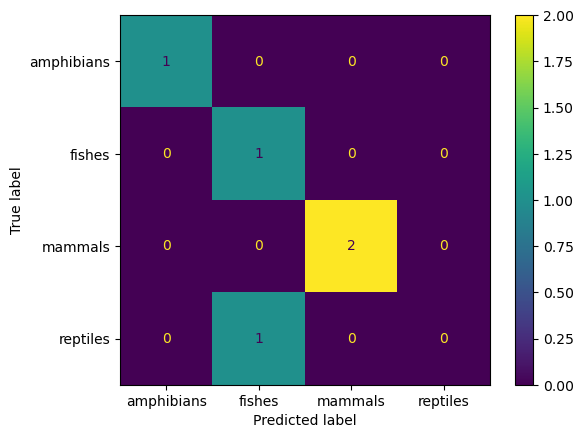

In [28]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [29]:
from sklearn.metrics import classification_report

In [30]:
report =classification_report(y_test,y_predict)

In [31]:
print(report)

              precision    recall  f1-score   support

  amphibians       1.00      1.00      1.00         1
      fishes       0.50      1.00      0.67         1
     mammals       1.00      1.00      1.00         2
    reptiles       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.62      0.75      0.67         5
weighted avg       0.70      0.80      0.73         5



In [32]:
df.columns

Index(['Warm-blooded', 'Gives Birth', 'Aquatic Creature', 'Aerial Creature',
       'Has Legs', 'Hibernates', 'Class'],
      dtype='object')

In [33]:
from sklearn import tree

In [34]:
x

,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,0,0,1,0
1,0,0,0,0,1
2,0,1,0,0,0
3,1,1,0,0,0
4,0,1,0,1,1
5,0,0,0,1,0
6,1,0,1,1,1
7,0,0,1,1,0
8,1,0,0,1,0
9,1,1,0,0,0


In [35]:
f=['Gives Birth','Aquatic Creature', 'Aerial Creature', 'Has Legs','Hibernates']

In [36]:
y

0        mammals
1       reptiles
2         fishes
3        mammals
4     amphibians
5       reptiles
6        mammals
7          birds
8        mammals
9         fishes
10      reptiles
11         birds
12       mammals
13        fishes
14    amphibians
Name: Class, dtype: object

In [37]:
c=['mammals','reptiles','fishes','amphibians','birds']

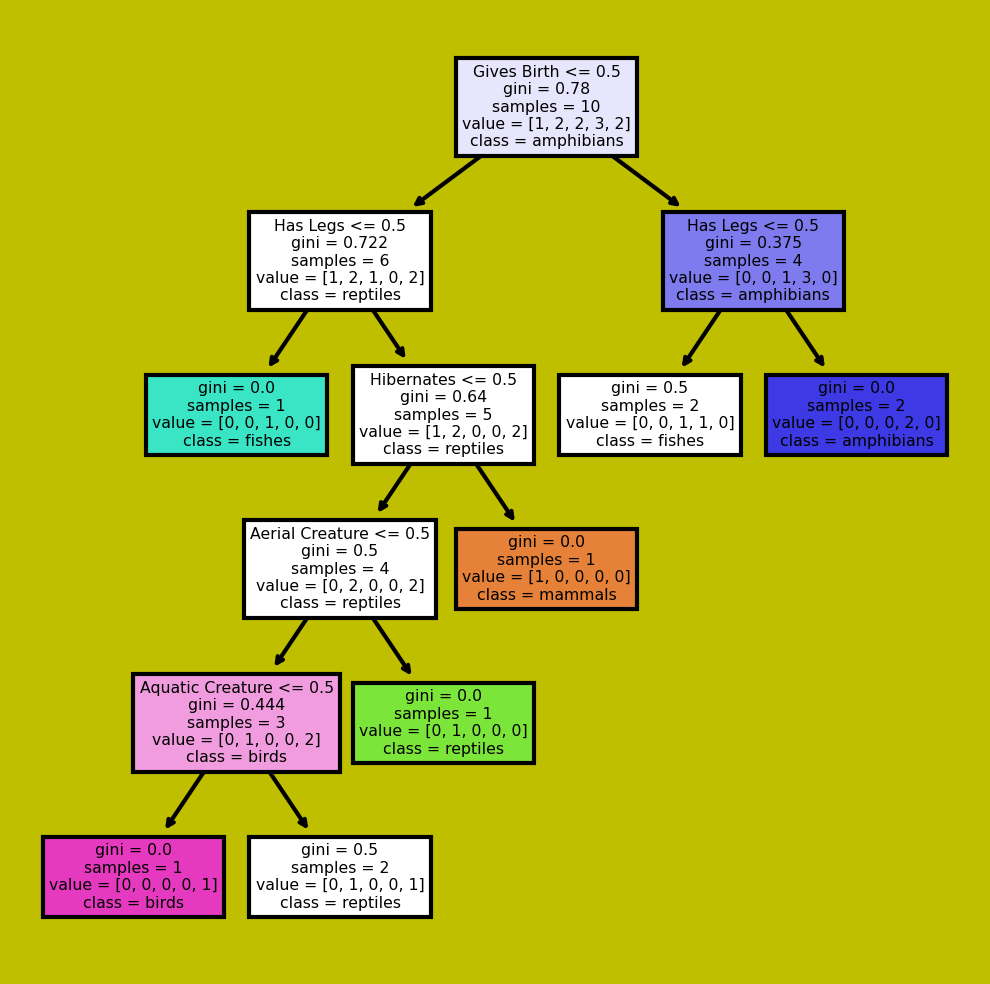

In [38]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300,facecolor='y')
tree.plot_tree(model,feature_names=f,class_names=c,filled=True)
fig.savefig('decision2.png')
plt.show()